
<div style="background-color:lightyellow; padding:10px; font-size: 22px; font-weight: bold; text-align:center;">Employee Performance Prediction</div>

<div style=" background-color: lightyellow; padding:10px; font-size:20px; text-align:justify; font-weight:bold;">Problem Statement.</div>

<div style=" background-color: lightyellow; padding:10px; font-size:18px; text-align: justify;">Build a model to predict performance of employees, based on the visualisation and analysis of past data of employee performance.</div>

<div style="background-color: lightyellow; padding:10px; font-size:20px; text-align:left; font-weight:bold;">Objectives.</div>

<div style= 'background-color: lightyellow; font-size:18px;'>

**Importing necessary Modules**:
- Import the modules necessary for Data Manipulation and Visualization.

**Reading dataset**:
- Read the dataset containing loan applicant information.

**Task 1 - Exploring the Dataset**:
- Understand the Structure and various data types of the attributes within the dataset.
  
**Task 2 - Cleaning the dataset**:
- Identify and analyze missing values in the dataset.

**Task 3 - Univariate Analysis**:
- Conduct univariate analysis to explore the distribution and characteristics of individual variables.

**Task 4 - Outliers**:
- Identify and analyze outliers within the dataset to understand their impact on the analysis.

**Task 5 - Bivariate analysis**:
- Conduct bivariate analysis to explore relationships between variables.

**Task 6 - Multivariate analysis**
- Conduct multivariate analysis with the Target variable and any other 5 variables.</div>

In [7]:
!pip install pandas numpy matplotlib seaborn --quiet

<div style="background-color:lightyellow; padding:10px; font-size: 20px; font-weight: bold; text-align:justify;">

Installing the required **Libraries**</div>

In [8]:
#Libraries loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings('ignore') # Filter out warnings to ignore them

<div style="background-color: lightyellow; padding:10px; font-size:20px; text-align:left; font-weight:bold;"> Dataset Importing and Understanding.</div>

In [22]:
#Loading the given data 
path_of_test_data = 'Desktop/Sprint Project/Mentorship/jUPITER/Test_data.csv'
test_data = pd.read_csv('Test_data.csv')
print(test_data.head())


   employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0     

<div style="background-color:lightyellow; padding:10px; font-size: 20px; font-weight: bold">Exploring the dataset.</div>

In [23]:
test_data.shape

(23490, 13)

<div style="padding:10px; font-size:16px; background-color: lightyellow; font-weight:bold; font-style: italic">The given dataframe has 23490 rows and 13 columns.</div>

In [24]:
test_data.index

RangeIndex(start=0, stop=23490, step=1)

In [25]:
test_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [26]:
test_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


<div style="background-color:lightyellow; padding:10px; font-size: 20px; font-weight: bold">Cleaning the DATA .</div>

In [ ]:
#Dropping of Unwanted Column
test_data = test_data.drop('employee_id', axis=1)

In [29]:
#Testing the null value count
test_data.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [30]:
#Finding the most common value
print(test_data["education"].mode())
print(test_data["previous_year_rating"].mode())

0    Bachelor's
Name: education, dtype: object
0    3.0
Name: previous_year_rating, dtype: float64


In [31]:
#Finding Unique Values
test_data.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings          9
age                     41
previous_year_rating     5
length_of_service       34
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
dtype: int64

<div style="padding:10px; font-size:16px; background-color: lightyellow; font-weight:bold; "> Duplicate Analysis</div>

In [32]:
#Testing for any Duplicate Values
test_data.duplicated().sum()

26

In [33]:
test_data.drop_duplicates(inplace=True)

In [34]:
test_data.duplicated().sum()

0

<div style="padding:10px; font-size:16px; background-color: lightyellow; font-weight:bold; "> We have seen that there are few columns that have null values in the dataframe. We will make changes to it in the cleaning part. There are no duplicate rows or values.</div>

<div style="padding:10px; font-size:16px; background-color: lightyellow; font-weight:bold; "> Null Value Analysis</div>

In [35]:
# Checking the percentage of null values for columns

100*(test_data.isna().mean()).sort_values(ascending=False)

previous_year_rating    7.658541
education               4.389703
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [36]:
# Education and Previous_year_rating have missing values to be imputed with mode and median

test_data['education'].fillna(test_data['education'].mode()[0], inplace=True)

In [37]:
test_data['previous_year_rating'].unique()

array([nan,  3.,  1.,  2.,  4.,  5.])

In [38]:
num_cols = ['previous_year_rating']
for col in num_cols:
    test_data[col].fillna(test_data[col].median(), inplace=True)

In [39]:
print(test_data.isnull().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64


In [40]:
#check for columns with one unique value, count and freq is same

test_data.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,23464,23464,23464,23464,23464
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,7304,5290,16589,16574,13064


<div style="padding:10px; font-size:16px; background-color: lightyellow; font-weight:bold; "> Mapping of Gender</div>

In [41]:
# Encode: 'm' = 0, 'f' = 1
test_data['gender'] = test_data['gender'].map({'m': 0, 'f': 1})

# Output the cleaned and encoded data
print(test_data)

              department     region         education  gender  \
0             Technology  region_26        Bachelor's       0   
1                     HR   region_4        Bachelor's       1   
2      Sales & Marketing  region_13        Bachelor's       0   
3            Procurement   region_2        Bachelor's       1   
4                Finance  region_29        Bachelor's       0   
...                  ...        ...               ...     ...   
23485              Legal   region_2   Below Secondary       0   
23486         Technology  region_25        Bachelor's       0   
23487                 HR  region_16        Bachelor's       1   
23488        Procurement  region_31        Bachelor's       0   
23489         Technology  region_17  Master's & above       0   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   24                   3.0   
1                   other                1   31                   3.0   


In [67]:
test_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,0,sourcing,1,24,3.0,1,1,0,77
1,HR,region_4,Bachelor's,1,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,0,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,1,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,0,sourcing,1,30,4.0,7,0,0,61


<div style="padding:10px; font-size:16px; background-color: lightyellow; font-weight:bold; "> We have cleaned the data by imputing numerical column with median and categorical column with mode. The duplicated rows have been eliminated. Also I have mapped the gender to binary values for ease of operation</div>

In [43]:
print(test_data['gender'].value_counts())
test_data['gender'].value_counts(normalize=True) * 100  # Percentage
imbalance_ratio = (test_data['gender'] == 0).sum() / (test_data['gender'] == 1).sum()
imbalance_ratio 

gender
0    16574
1     6890
Name: count, dtype: int64


2.4055152394775035

<div style="padding:10px; font-size:20px; background-color: lightyellow; font-weight:bold; ">EDA</div>

<div style="padding:10px; font-size:18px; background-color: lightyellow; font-weight:bold; ">Univariate Analysis</div>

In [44]:
test_data[['gender', 'department', 'region', 'recruitment_channel']].value_counts()

gender  department         region     recruitment_channel
0       Sales & Marketing  region_2   other                  494
                                      sourcing               376
                           region_7   other                  267
1       Procurement        region_2   other                  251
0       Sales & Marketing  region_22  other                  244
                                                            ... 
1       Sales & Marketing  region_33  sourcing                 1
0       Legal              region_24  other                    1
                           region_23  sourcing                 1
                                      other                    1
        HR                 region_10  sourcing                 1
Name: count, Length: 953, dtype: int64

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;"> Bar Plots</div>

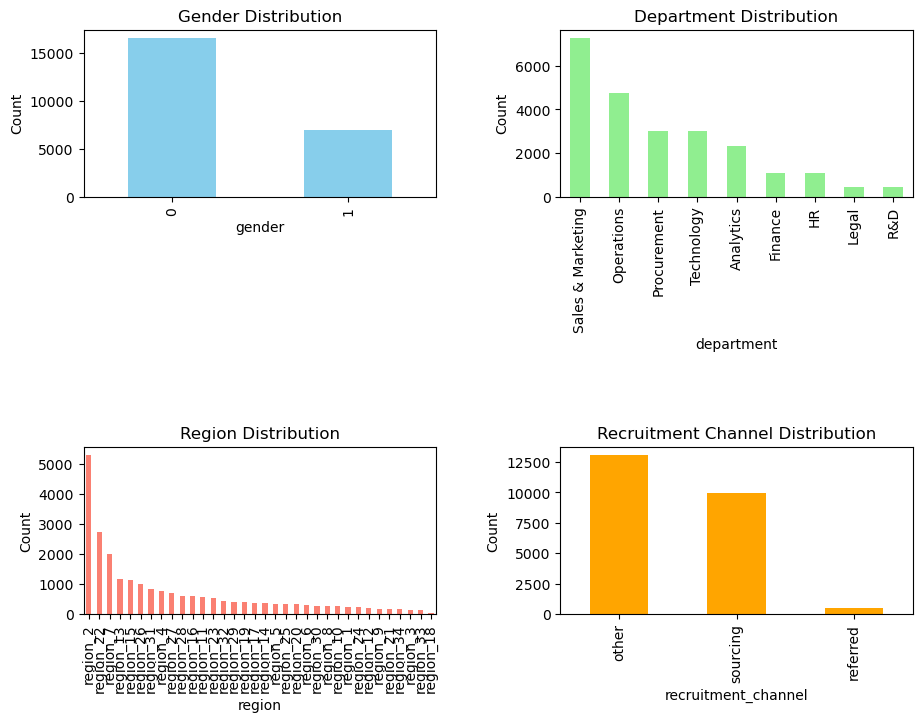

In [45]:
# Create a DataFrame
df = pd.DataFrame(test_data)

# List of columns to plot and their titles
columns = ['gender', 'department', 'region', 'recruitment_channel']
titles = ['Gender Distribution', 'Department Distribution', 
          'Region Distribution', 'Recruitment Channel Distribution']
colors = ['skyblue', 'lightgreen', 'salmon', 'orange']

# Create a figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Loop through each column and plot
for i, col in enumerate(columns):
    df[col].value_counts().plot.bar(ax=axes[i], color=colors[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout(pad=3.5)
plt.subplots_adjust(hspace=1.5)
plt.show()

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;"> Pie Plots</div>

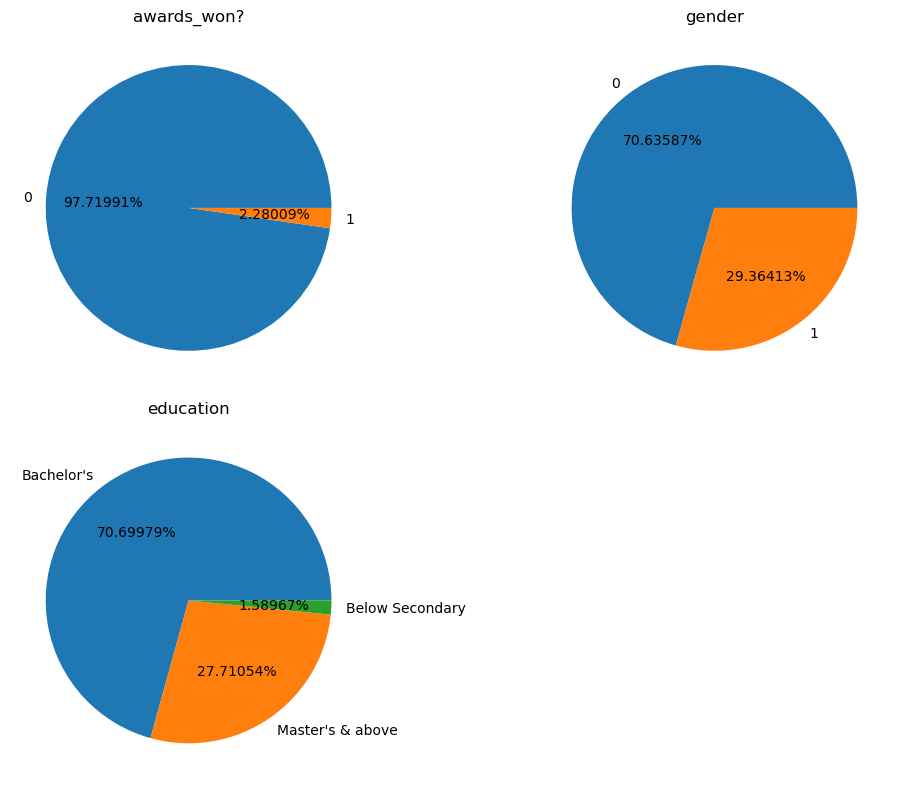

In [46]:
# Pie plots for columns
columns_plotting = ['awards_won?', 'gender', 'education']

# Determine subplot grid size
charts_number = len(columns_plotting)
cols = 2
rows = (charts_number + cols - 1) // cols

# Create subplots with exact number of axes
fig, axes = plt.subplots(rows, cols, figsize=(10, 8))

# Flatten axes only if more than 1 subplot, else keep as list
if charts_number == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Create each pie chart
for i, column in enumerate(columns_plotting):
    counts = test_data[column].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.5f%%', startangle=0)
    axes[i].set_title(column)

# Remove extra axes (if any were created due to rounding up)
for ax in axes[charts_number:]:
    ax.remove()

plt.tight_layout()
plt.show()

In [47]:
test_data.select_dtypes(include=['float64', 'int64']).columns

Index(['gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;"> KDE plots</div>

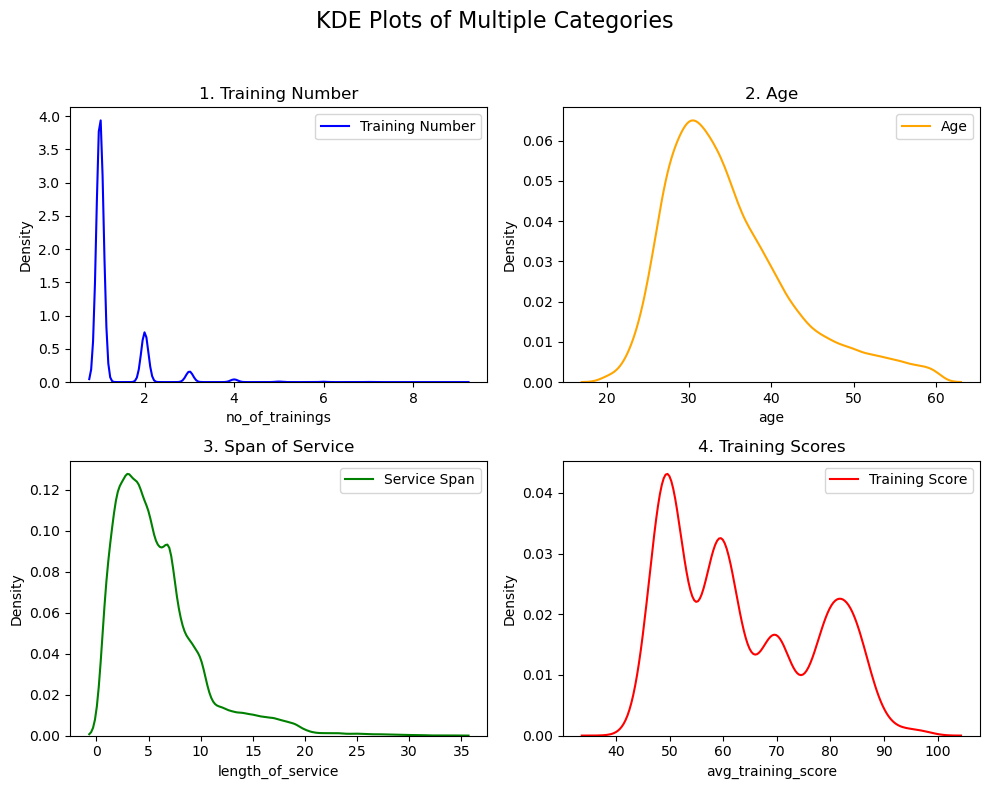

In [48]:
# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Titles for each subplot
# Plot KDE for each category in its respective subplot
sns.kdeplot(test_data['no_of_trainings'], ax=axes[0, 0], color='blue', label='Training Number')
axes[0, 0].set_title('1. Training Number')
axes[0, 0].legend()

sns.kdeplot(test_data['age'], ax=axes[0, 1], color='orange', label='Age')
axes[0, 1].set_title('2. Age')
axes[0, 1].legend()

sns.kdeplot(test_data['length_of_service'], ax=axes[1, 0], color='green', label='Service Span')
axes[1, 0].set_title('3. Span of Service')
axes[1, 0].legend()

sns.kdeplot(test_data['avg_training_score'], ax=axes[1, 1], color='red', label='Training Score')
axes[1, 1].set_title('4. Training Scores')
axes[1, 1].legend()

# Adjust spacing and add overall title
fig.suptitle('KDE Plots of Multiple Categories', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;"> Histogram</div>

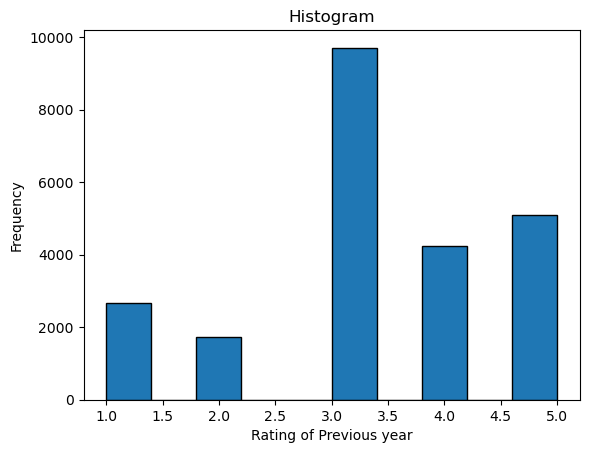

In [49]:
# Plotting the histogram for loan amount
plt.hist(test_data['previous_year_rating'], bins=10, edgecolor='black')  # bins specify the number of intervals
plt.title('Histogram')
plt.xlabel('Rating of Previous year')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;"> Count Plot</div>

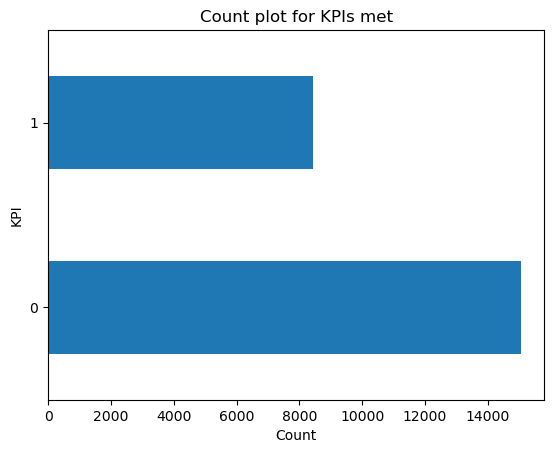

In [50]:
#Count plot for the grade.
test_data['KPIs_met >80%'].value_counts().plot(kind = 'barh')
# Replace 'purpose' with a numerical column if needed
plt.xlabel('Count') 
plt.ylabel('KPI')# Add label for the x-axis
plt.title('Count plot for KPIs met')  # Add a title
plt.show()

<div style="background-color: lightyellow; padding:10px; font-size:20px; text-align:left; font-weight: bold;"> Bivariate Analysis</div>

In [51]:
test_data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [52]:
test_data[['gender', 'avg_training_score']].head()

,gender,avg_training_score
0,0,77
1,1,51
2,0,47
3,1,65
4,0,61


<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;"> Box Plots</div>

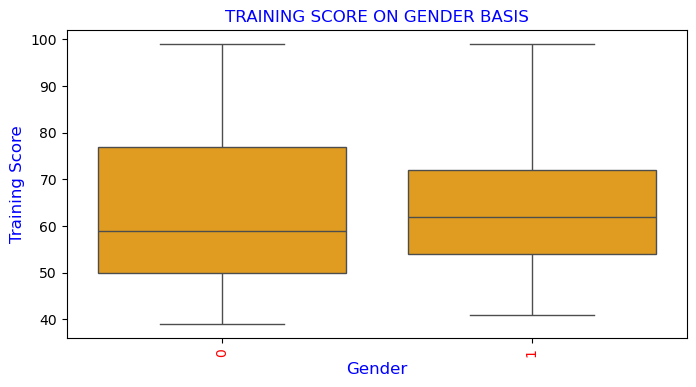

In [53]:
plt.figure(figsize=(8, 4))
sns.boxplot(data = test_data[['gender', 'avg_training_score']], x = 'gender', y = 'avg_training_score', color = 'orange')
plt.title('Training Score on Gender basis'.upper(), color = 'b', fontsize = 12)
plt.xlabel('Gender', fontsize = 12, color = 'b')
plt.ylabel('Training Score', fontsize = 12, color = 'b')
plt.xticks(rotation = 90, color = 'r')
plt.show()

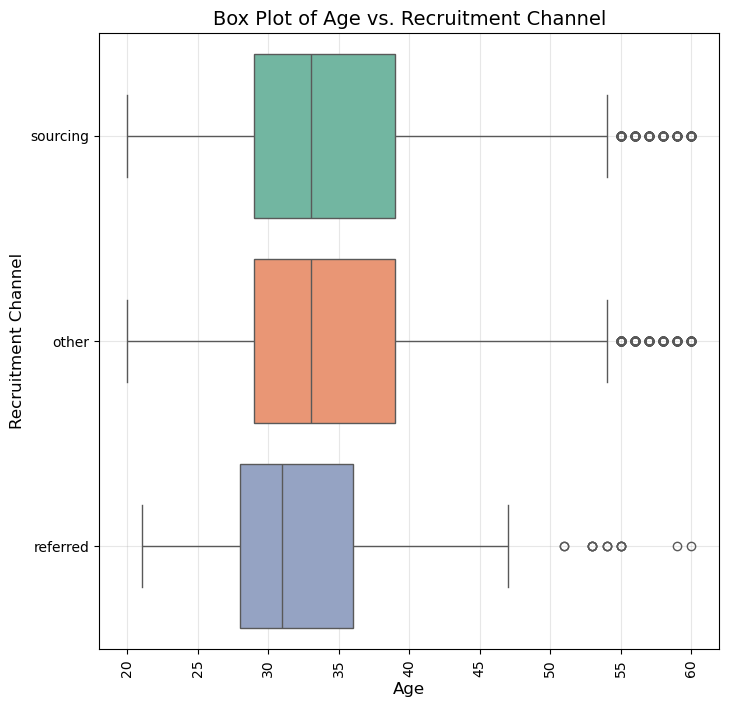

In [54]:
# Create the Box plot
plt.figure(figsize=(8, 8))
X = test_data['recruitment_channel']
Y= test_data['age']

sns.boxplot(x=Y,
    y=X,
    hue = X,
    palette='Set2',
    legend = False)


# Customizing the plot
plt.title('Box Plot of Age vs. Recruitment Channel', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('Recruitment Channel', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

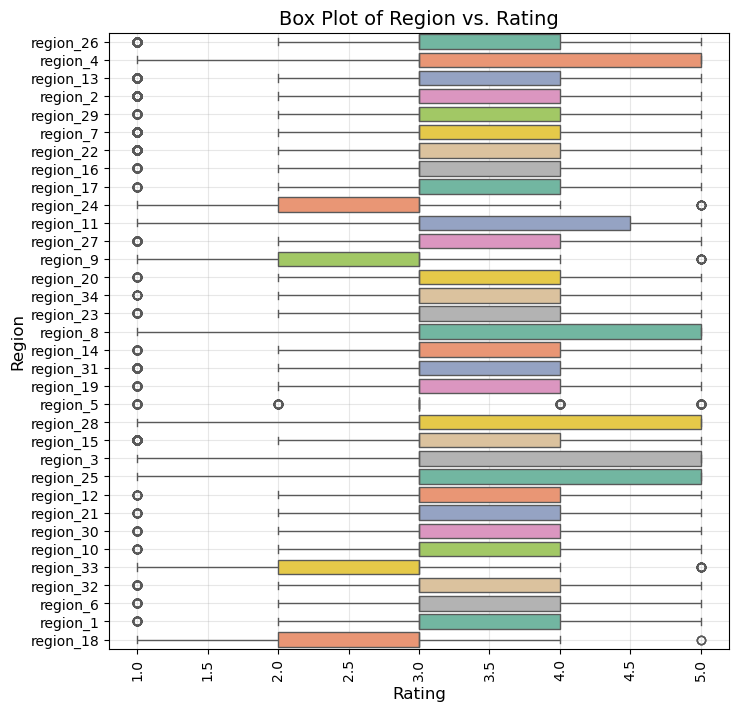

In [55]:
# Create the Box plot
plt.figure(figsize=(8, 8))
X = test_data['region']
Y= test_data['previous_year_rating']

sns.boxplot(x=Y,
    y=X,
    hue = X,
    palette='Set2',
    legend = False)


# Customizing the plot
plt.title('Box Plot of Region vs. Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('Region', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

In [56]:
test_data['department'].unique()
test_data['department'].value_counts()

department
Sales & Marketing    7304
Operations           4760
Procurement          3018
Technology           3010
Analytics            2312
Finance              1091
HR                   1084
Legal                 445
R&D                   440
Name: count, dtype: int64

In [57]:
test_data[['department', 'avg_training_score']].value_counts().head()

department         avg_training_score
Sales & Marketing  50                    1066
                   49                    1000
                   48                     938
                   51                     875
                   47                     693
Name: count, dtype: int64

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;"> Strip Plot</div>

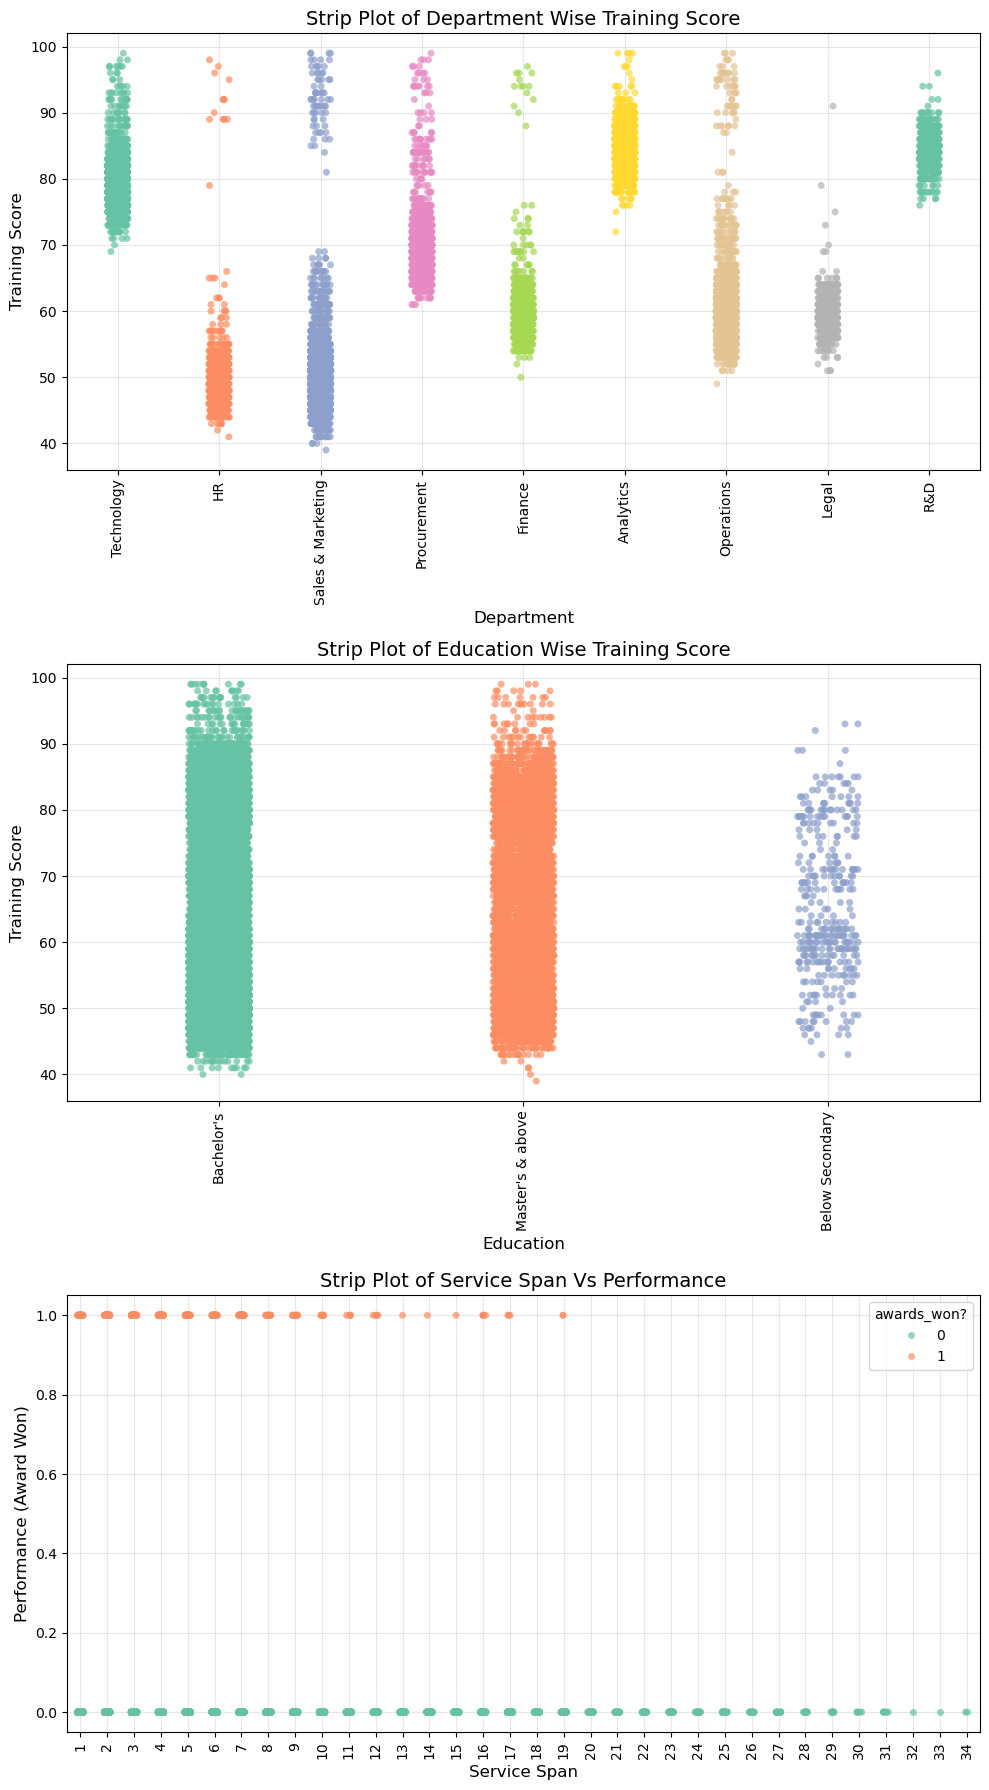

In [58]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18))  # 3 rows, 1 column

# Plot 1: Department vs Training Score
sns.stripplot(
    data=test_data,
    x='department',
    y='avg_training_score',
    hue='department',
    palette='Set2',
    alpha=0.7,
    ax=axes[0])

axes[0].set_title('Strip Plot of Department Wise Training Score', fontsize=14)
axes[0].set_xlabel('Department', fontsize=12)
axes[0].set_ylabel('Training Score', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(alpha=0.3)


# Plot 2: Education vs Training Score
sns.stripplot(
    data=test_data,
    x='education',
    y='avg_training_score',
    hue='education',
    palette='Set2',
    alpha=0.7,
    ax=axes[1])

axes[1].set_title('Strip Plot of Education Wise Training Score', fontsize=14)
axes[1].set_xlabel('Education', fontsize=12)
axes[1].set_ylabel('Training Score', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(alpha=0.3)


# Plot 3: Length of Service vs Awards Won
sns.stripplot(
    data=test_data,
    x='length_of_service',
    y='awards_won?',
    hue='awards_won?',
    palette='Set2',
    alpha=0.7,
    ax=axes[2])

axes[2].set_title('Strip Plot of Service Span Vs Performance', fontsize=14)
axes[2].set_xlabel('Service Span', fontsize=12)
axes[2].set_ylabel('Performance (Award Won)', fontsize=12)
axes[2].tick_params(axis='x', rotation=90)
axes[2].grid(alpha=0.3)


plt.tight_layout()
plt.show()

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;"> Scatter Plot</div>

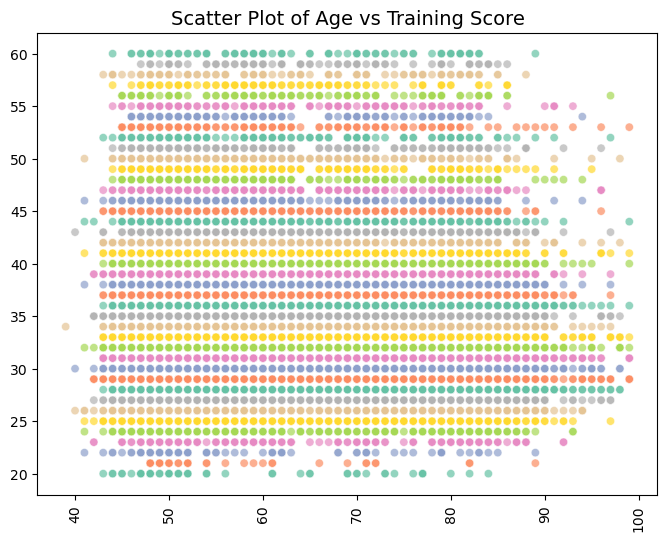

In [59]:
# Create the scatter plot
X = test_data['age']
Y= test_data['avg_training_score']
plt.figure(figsize=(8, 6), alpha = 0.7)
sns.scatterplot(x=Y,
    y=X,
    hue = X,
    palette='Set2',
    alpha=0.7, legend = False)


# Customizing the plot
plt.title('Scatter Plot of Age vs Training Score', fontsize=14)
plt.xlabel('', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('', fontsize=12)


plt.show()

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;">  Bar Plot</div>

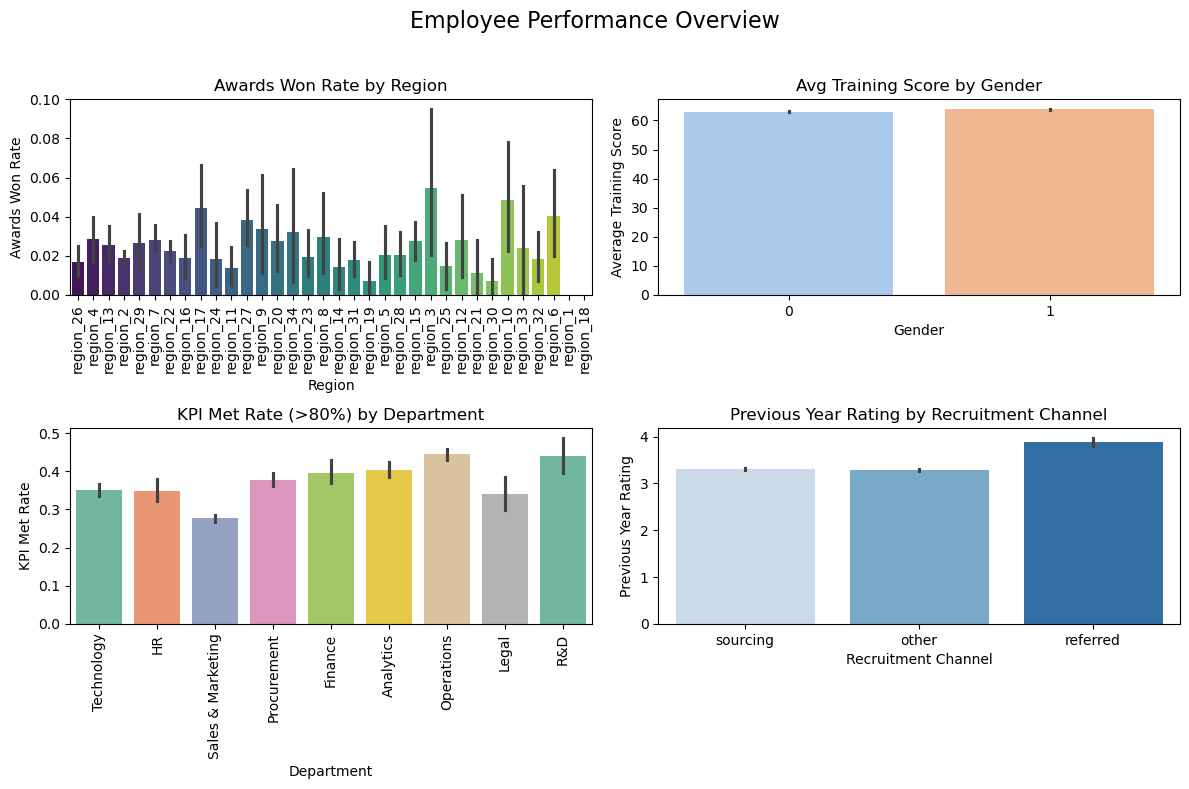

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=100)  # 2 rows, 2 columns
fig.suptitle('Employee Performance Overview', fontsize=16)

# 1. Region vs Awards Won
sns.barplot(data=test_data, x='region', y='awards_won?', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Awards Won Rate by Region')
axes[0, 0].set_xlabel('Region')
axes[0, 0].set_ylabel('Awards Won Rate')
axes[0, 0].tick_params(axis='x', rotation=90)

# 2. Gender vs Avg Training Score
sns.barplot(data=test_data, x='gender', y='avg_training_score', palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Avg Training Score by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Average Training Score')

# 3. Department vs KPI Met Rate
sns.barplot(data=test_data, x='department', y='KPIs_met >80%', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('KPI Met Rate (>80%) by Department')
axes[1, 0].set_xlabel('Department')
axes[1, 0].set_ylabel('KPI Met Rate')
axes[1, 0].tick_params(axis='x', rotation=90)

# 4. Recruitment Channel vs Previous Year Rating
sns.barplot(data=test_data, x='recruitment_channel', y='previous_year_rating', palette='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Previous Year Rating by Recruitment Channel')
axes[1, 1].set_xlabel('Recruitment Channel')
axes[1, 1].set_ylabel('Previous Year Rating')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;">  Count Plot</div>

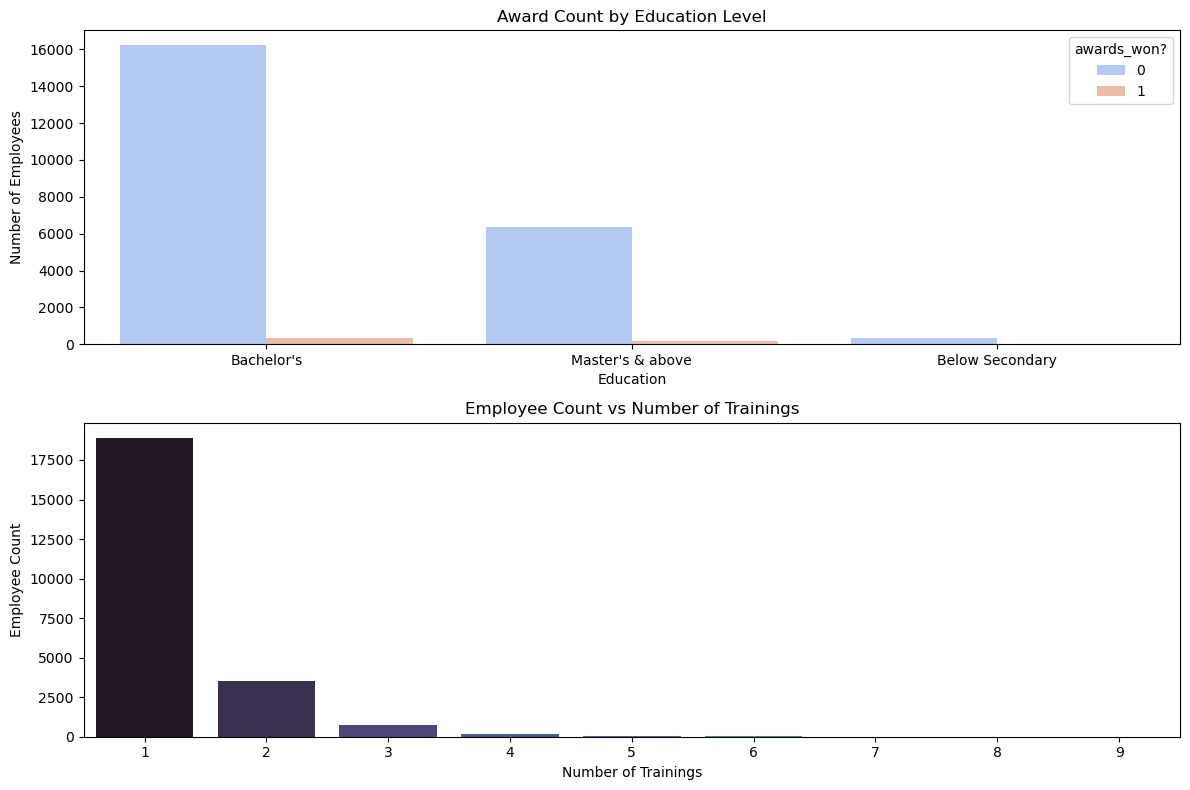

In [61]:

# Create 1 row with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(12,8))  # Width and height in inches

# --- Subplot 1: Education vs Awards Won ---
sns.countplot(data=test_data, x='education', hue='awards_won?', palette='coolwarm', ax=axes[0])
axes[0].set_title('Award Count by Education Level')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Number of Employees')
axes[0].tick_params(axis='x', rotation=0)

# --- Subplot 2: No. of Trainings ---
sns.countplot(data=test_data, x='no_of_trainings', palette='mako', ax=axes[1])
axes[1].set_title('Employee Count vs Number of Trainings')
axes[1].set_xlabel('Number of Trainings')
axes[1].set_ylabel('Employee Count')

# Final layout adjustment
plt.tight_layout()
plt.show()

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;"> Violin Plot</div>

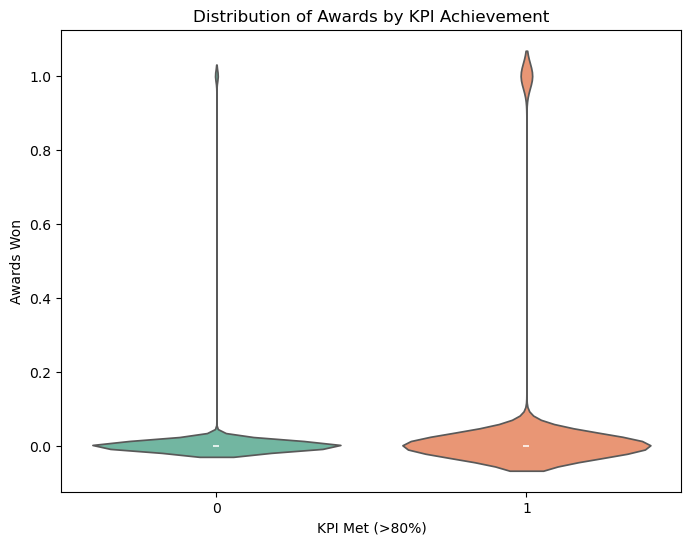

In [62]:
# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='KPIs_met >80%', 
    y='awards_won?', 
    data=df,
    inner='box', 
    palette='Set2'
)

plt.title('Distribution of Awards by KPI Achievement')
plt.xlabel('KPI Met (>80%)')
plt.ylabel('Awards Won')
plt.show()

<div style="background-color: lightyellow; padding:10px; font-size:20px; text-align:left; font-weight: bold;"> Multivariate Analysis</div>

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;"> Heat Plot</div>

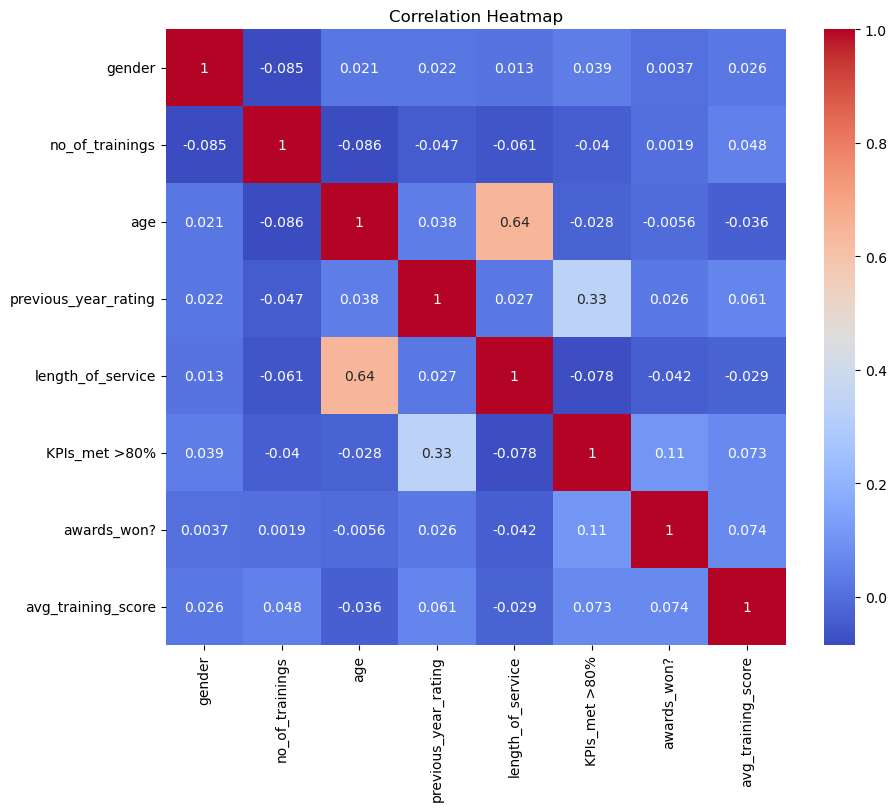

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(test_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;"> Stacked Bar Plot</div>

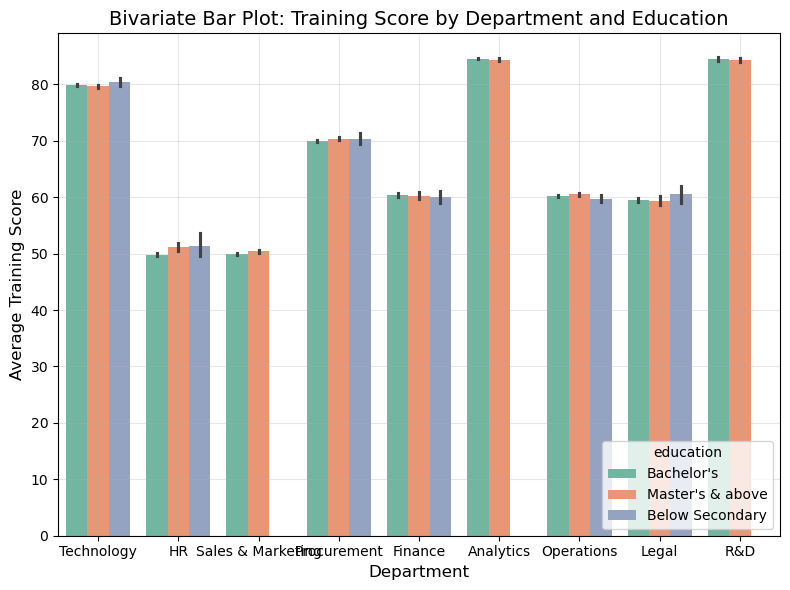

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=test_data,
    x='department',
    y='avg_training_score',
    hue='education',  # Second categorical variable
    palette='Set2'
)

plt.title('Bivariate Bar Plot: Training Score by Department and Education', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Training Score', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;"> Scatter Plot</div>

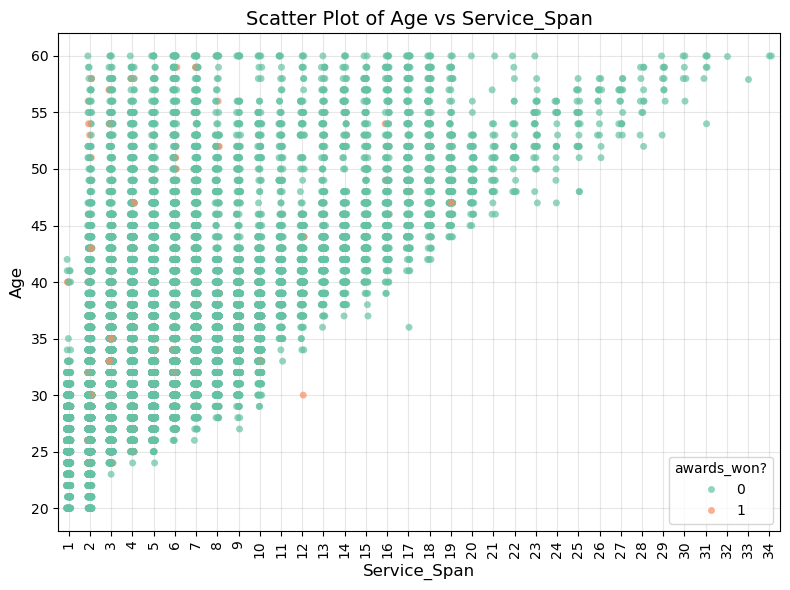

In [65]:
plt.figure(figsize=(8, 6))
sns.stripplot(
    data=test_data,
    x='length_of_service',
    y='age',
    hue='awards_won?',
    palette='Set2',
    alpha=0.7) # To better distinguish overlapping points


# Customizing the plot
plt.title('Scatter Plot of Age vs Service_Span', fontsize=14)
plt.xlabel('Service_Span', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('Age', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background-color: lightyellow; padding:10px; font-size:16px; text-align:left; font-weight: bold;"> Pair Plot</div>

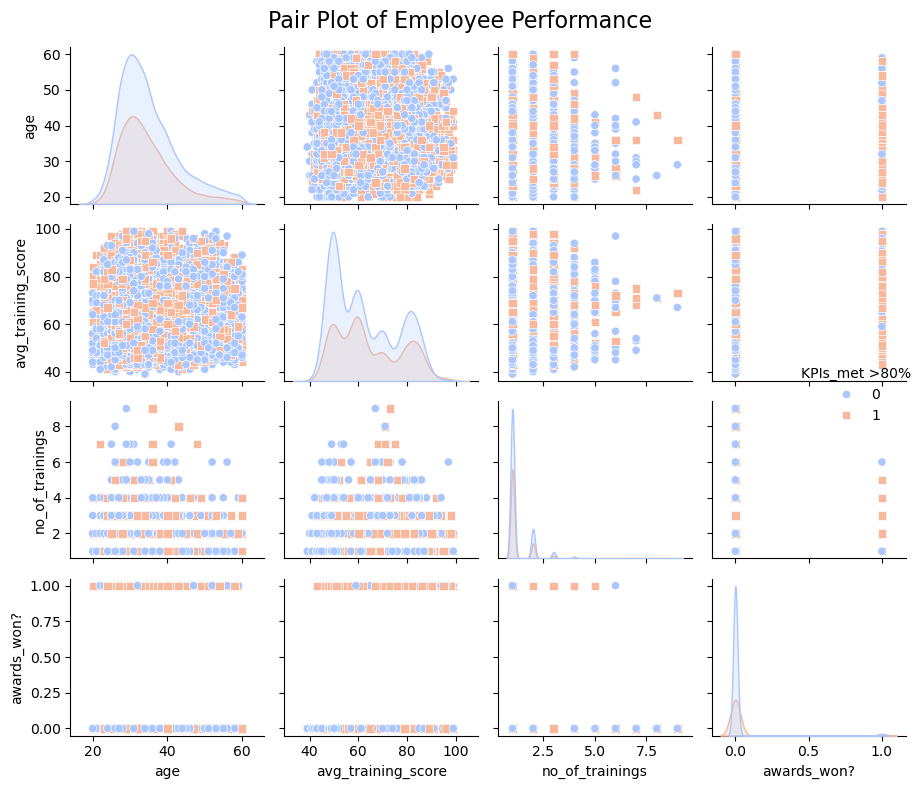

In [66]:
pair_plot_data = test_data[['age', 'avg_training_score', 'no_of_trainings', 'KPIs_met >80%', 'awards_won?']]

# Create the pair plot
sns.pairplot(pair_plot_data, hue='KPIs_met >80%', palette='coolwarm', markers=["o", "s"], height=2)

# Display the plot
plt.suptitle('Pair Plot of Employee Performance', fontsize=16)
plt.tight_layout()
plt.show()